# Population vector tutorial

First, some essential functions (numerics, plotting) are loaded from the respective packages (`numpy`, `matplotlib`).

In [7]:
import numpy as np
import matplotlib.pyplot as plt

Define the number of neurons, for example `N=8`.

In [8]:
N = 8
print("Number of neurons: ", N)

Number of neurons:  8


Assign a preferred angle to each neuron. Angles are usually expressed in the interval $[0,2\pi]$ radians, corresponding to $[0,360]$ degrees.

In [9]:
phi = 2*np.pi*np.arange(N)/N
print("Principal directions: ", phi/(2*np.pi))

Principal directions:  [0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875]


Number of grasp directions and angles

In [10]:
M = 6
psi = 2*np.pi*np.arange(M)/M
print("grasp angles: ", psi/(2*np.pi))

grasp angles:  [0.         0.16666667 0.33333333 0.5        0.66666667 0.83333333]


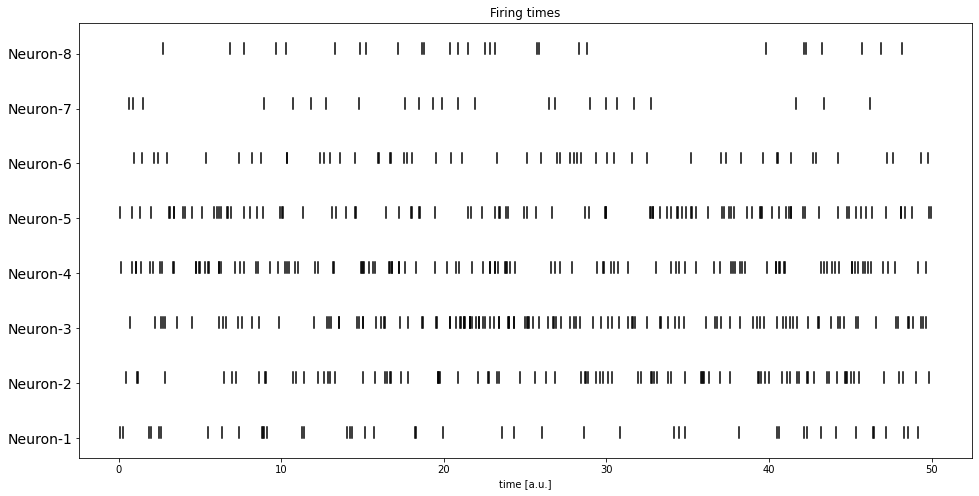

In [15]:
# define grasp direction to be reconstructed
phi0 = psi[2]

# Poisson point process with angle-dependent rate
q0 = 1.5 # basal firing rate
q = q0 + np.cos(phi-phi0) # scalar product -> cos(phi-psi)
#print("\nPoisson rates:")
#for i in range(N): print(f"q({i:d}) = {q[i]:.2f}")

# exponentially distributed waiting times
T = 50 # simulation time
t = [[] for i in range(N)] # list of lists, firing times for each neuron
for i in range(N):
    while (np.sum(t[i]) < T):
        r = np.random.rand() # uniform random variable ~ U[0,1]
        t[i].append(-np.log(r)/q[i]) # add exponentially distributed waiting time
    t[i] = np.cumsum(t[i][:-1]).tolist() # waiting times (ISI) => firing times, max. time < T
    #print(t[i])
    #print(np.max(t[i]))

# make raster plot
plt.figure(figsize=(16,8))
for i in range(N):
    y = 0.5*i
    for t_ in t[i]:
        plt.plot([t_, t_], [y, y+0.1], '-k') # vertical sticks
ax = plt.gca()
ax.set_yticks(np.arange(N)*0.5)
ax.set_yticklabels([f"Neuron-{i+1:d}" for i in range(N)], fontsize=14)
plt.xlabel("time [a.u.]")
plt.title("Firing times")
plt.show()

Estimate grasp direction from neuronal firing data.


Comparison of real (q) and estimated (q_hat) firing rates:


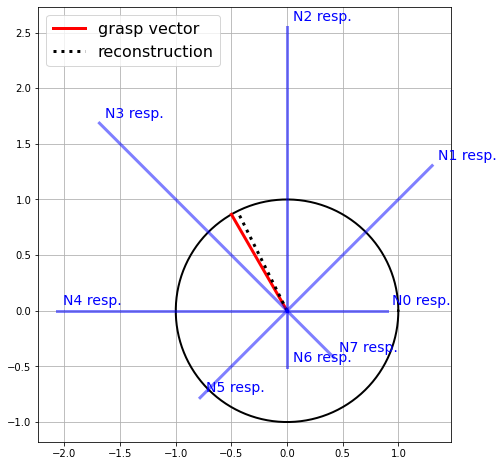

In [29]:
print("\nComparison of real (q) and estimated (q_hat) firing rates:")
q_hat = np.zeros(N)
for i in range(N):
    isi_mean = np.mean(np.diff(t[i]))
    q_hat[i] = 1/isi_mean
    #print(f"q({i:d}): {q[i]:.2f} - {q_hat[i]:.2f}")

# reconstructed grasp vector
v1 = np.dot(q_hat,np.exp(1j*phi)) #/ np.sum(q_hat)
v1 /= np.abs(v1)
#v1 = 0
#for i in range(N): v1 += (q_hat[i]*np.exp(1j*phi[i]))
#v1 /= np.sum(q_hat) # scale by q_hat

C = np.exp(1j*2*np.pi*np.linspace(0,1,500)) # unit circle
plt.figure(figsize=(8,8))
plt.plot(C.real, C.imag, '-k', lw=2) # unit circle
# original grasp vector
plt.plot([0,np.cos(phi0)], [0,np.sin(phi0)], '-r', lw=3, alpha=1.0, label="grasp vector")
# reconstructed grasp vector
plt.plot([0,v1.real], [0,v1.imag], ':k', lw=3, alpha=1.0, label="reconstruction")
d = 0.05
for i in range(N):
    # neuron i response vector
    xi = q_hat[i]*np.cos(phi[i])
    yi = q_hat[i]*np.sin(phi[i])
    plt.plot([0,xi], [0,yi], '-b', lw=3, alpha=0.5)
    plt.annotate(f"N{i:d} resp.", xy=(xi+d,yi+d), xycoords="data", c="blue", fontsize=14)
plt.grid(True)
plt.legend(loc=2, fontsize=16)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()